In [50]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import autograd.numpy as numpy
import autograd.numpy.random as npr
from sklearn.metrics import accuracy_score, classification_report
from autograd import elementwise_grad
from scipy.optimize import minimize
from tqdm import tqdm 
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.utils import shuffle
from sklearn.utils import resample
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.svm import LinearSVC
from sklearn.metrics import roc_curve, auc
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold, cross_val_score
from sklearn import model_selection
from sklearn import tree
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.utils import shuffle
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder

In [ ]:
movies = pd.read_csv('/Users/marieqi/Downloads/movieTitles.csv', header= None)
ratings = {}
index = None
with open('/Users/marieqi/Downloads/data.txt', 'r') as file:
    for line in file:
        if ':' in line:
            index = int(line.strip().split(':')[0])-1
            movie_title=movies.iloc[index, 2]
        else:
            user_id, rating, date = line.split(',')
            if user_id in ratings:
                ratings[user_id].append((movie_title, rating, date))
            else:
                ratings[user_id] = [(movie_title, rating, date)]
rows = []
for user_id, ratings_list in ratings.items():
    for rating_tuple in ratings_list:
        rows.append([user_id] + list(rating_tuple))
        
columns = ['user_id', 'movie_title', 'rating', 'date']

df = pd.DataFrame(rows, columns=columns)


In [ ]:
print(df.groupby('user_id')

In [77]:
df['rating'] = df['rating'].astype(int)
label_encoder = LabelEncoder()
df['movie_title_encoded'] = label_encoder.fit_transform(df['movie_title'])
df.drop(columns=['movie_title'], inplace=True)
df.rename(columns={'movie_title_encoded': 'movie_title'}, inplace=True)
y_train = df.groupby('movie_title').apply(lambda x: x.sample(n=1, random_state=17394390))
df = df.drop(index=y_train.index.get_level_values(1))
y_train = y_train.drop(['user_id','date', 'movie_title'], axis=1)
X_test = df.groupby('movie_title').apply(lambda x: x.sample(n=1, random_state=17394390))
df = df.drop(index=X_test.index.get_level_values(1))
y_test = X_test['rating']
y_test = y_test






In [80]:
X_t = df.groupby('movie_title').apply(lambda x: x.sample(n=1, random_state=17394390))
df = df.drop(index=X_t.index.get_level_values(1))
X_test =X_t['rating']

In [81]:
grouped = df.groupby('movie_title')
average = int(np.floor(df.size/4965))

def pad(group, size):
    ratings = group['rating'].values
    avg_rating = ratings.mean()
    if len(ratings) < size:
        return np.pad(ratings, (0, size - len(ratings)), 'constant', constant_values=avg_rating)
    else:
        return ratings[:size]
padded_groups = []
for movie, group in grouped:
    padded_ratings = pad(group, average)
    padded_groups.append(padded_ratings)
ratings_matrix = np.array(padded_groups)


<class 'numpy.ndarray'>


<class 'numpy.ndarray'>


In [84]:
X_train= ratings_matrix
y_train = np.asarray(y_train)
X_test = np.asarray(X_test)
y_test = np.asarray(y_test)

y_train = np.asarray(y_train).flatten()
y_test = np.asarray(y_test).flatten()
y_train = y_train.astype(int)
y_test = y_test.astype(int)



[3 4 3 ... 3 1 1]


In [87]:
model = sm.OLS(y_train, X_train).fit()
predictions = model.predict(X_train)
mse = mean_squared_error(y_test, predictions)
print(np.sqrt(mse))


1.3572665955560554


[1 4 3 ... 3 4 3]


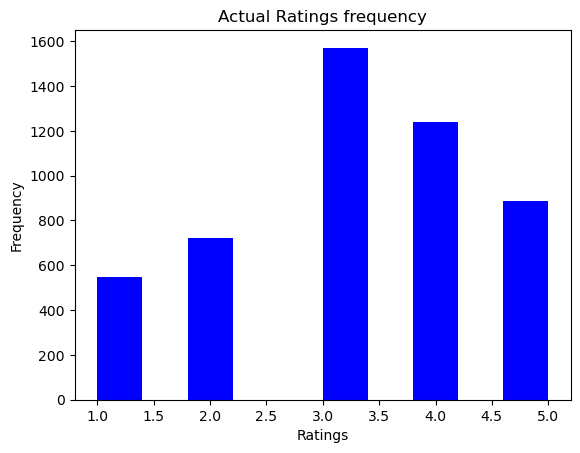

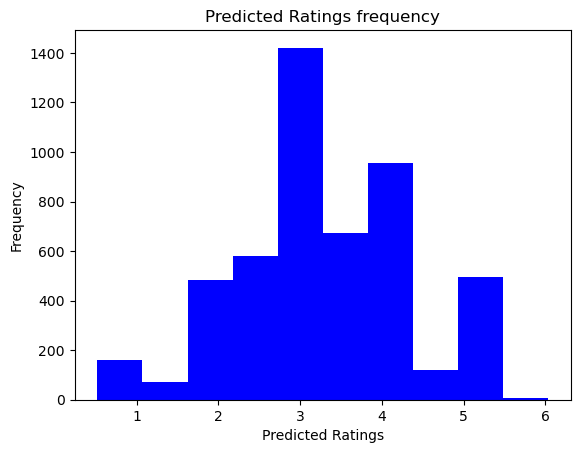

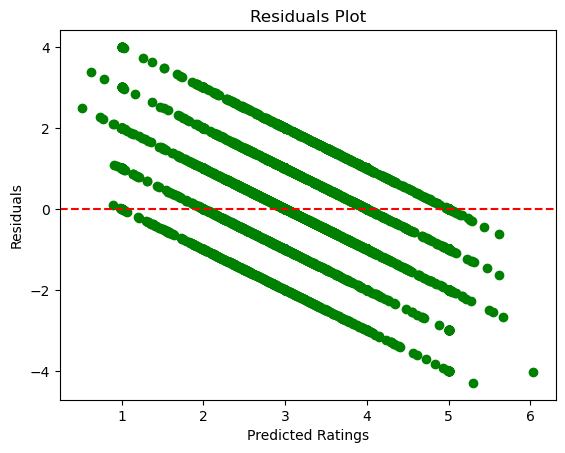

In [117]:
x_values = np.linspace(min(y_test), max(y_test), 100)
y_values = model.params[1] * x_values + model.params[0]
fig = plt.figure()
plt.hist(y_test, color='blue')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.title('Actual Ratings frequency')
plt.show()
fig.savefig('/Users/marieqi/Downloads/actual.png')

fig = plt.figure()
plt.hist(predictions, color='blue')
plt.xlabel('Predicted Ratings')
plt.ylabel('Frequency')
plt.title('Predicted Ratings frequency')
plt.show()
fig.savefig('/Users/marieqi/Downloads/pred.png')



residuals = y_test - predictions
fig = plt.figure()
plt.scatter(predictions, residuals, color='green')
plt.xlabel('Predicted Ratings')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.axhline(y=0, color='red', linestyle='--')
plt.show()
fig.savefig('/Users/marieqi/Downloads/resid.png')

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA 
from sklearn.manifold import TSNE
from sklearn.metrics import pairwise_distances
from sklearn.manifold import MDS
from sklearn.cluster import DBSCAN
from sklearn.metrics import pairwise_distances

In [ ]:
def millitominutes(milli):
    return(milli/60000)
file="/Users/marieqi/Downloads/musicData.csv"
data = pd.read_csv(file)
data.replace('?', np.nan, inplace=True)
df = data.dropna()
label_encoder = LabelEncoder()
df['mode_binary'] = df['mode'].map({'Major': 1, 'Minor': 0})
df.drop(columns = ['mode'], inplace=True)
df['key'] = label_encoder.fit_transform(df['key'])
df['music_genre'] = label_encoder.fit_transform(df['music_genre'])
df['duration_ms'] = df['duration_ms'].apply(millitominutes)
scaler = StandardScaler()
pca = PCA()
df = df.drop(df.columns[:3], axis=1)
df = df.drop(['obtained_date'], axis=1)
continuous_cols = ['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy', 
                   'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']
binary_dummy_cols = [col for col in df.columns if col not in continuous_cols]
scaler = StandardScaler()
X_continuous_scaled = scaler.fit_transform(df[continuous_cols])
X_scaled = np.concatenate((X_continuous_scaled, df[binary_dummy_cols].values), axis=1)
Xpca = pca.fit_transform(X_scaled)
df_pca = pd.DataFrame(data=Xpca[:,:3], columns=['PC1', 'PC2','PC3'])
ratio=pca.explained_variance_ratio_
cluster_range = range(2, 10)
silhouette_scores = []
kmeans=KMeans(n_clusters=2)
kmeans.fit(df_pca)
df_pca["Cluster"]=kmeans.labels_
cumvar=np.cumsum(ratio)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter=ax.scatter(df_pca['PC1'], df_pca['PC2'], df_pca['PC3'],c=df_pca['Cluster'], cmap='viridis')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.colorbar(scatter, ax=ax, label='Cluster')
plt.show()
fig.savefig('/Users/marieqi/Downloads/pca.png')
components_table = pd.DataFrame({
    'Principal Component': range(1, pca.n_components_ + 1),
    'Explained Variance Ratio': ratio,
    'Cumulative Explained Variance Ratio': np.cumsum(pca.explained_variance_ratio_)
})
fig = plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumvar) + 1), cumvar, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components vs Cumulative Explained Variance')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()
fig.savefig('/Users/marieqi/Downloads/cumul.png')
eigenvalues=pca.explained_variance_
retained_components=np.sum(eigenvalues >1)
print("Number of retained components:", retained_components)

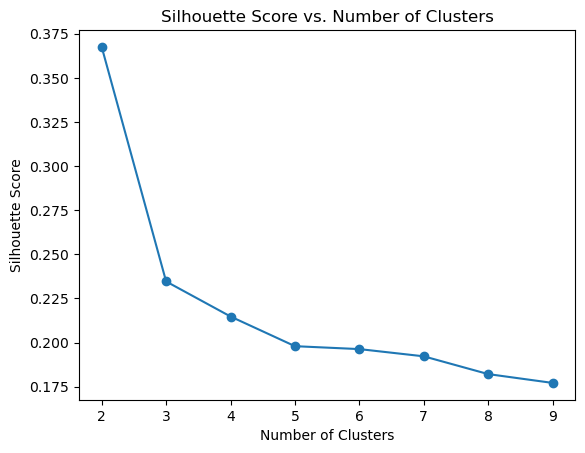

In [116]:
df_pca = pd.DataFrame(data=Xpca[:,:5], columns=['PC1', 'PC2','PC3', 'PC4', 'PC5'])
cluster_range=range(2, 10)
silhouette_scores=[]
kmeans=KMeans(n_clusters=2)
kmeans.fit(df_pca)
for n_clusters in cluster_range:
    kmeans=KMeans(n_clusters=n_clusters, random_state=17394390)
    kmeans.fit(df_pca)
    labels=kmeans.labels_
    silhouette_avg=silhouette_score(df_pca, labels)
    silhouette_scores.append(silhouette_avg)
fig = plt.figure()
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.show()
fig.savefig('/Users/marieqi/Downloads/sil.png')

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA 
from sklearn.manifold import TSNE
from sklearn.metrics import pairwise_distances
from sklearn.manifold import MDS
from sklearn.cluster import DBSCAN
from sklearn.metrics import pairwise_distances

In [ ]:
file="/Users/marieqi/Downloads/musicData.csv"
data = pd.read_csv(file)
data.replace('?', np.nan, inplace=True)
df = data.dropna()
label_encoder = LabelEncoder()
df['mode_binary'] = df['mode'].map({'Major': 1, 'Minor': 0})
df.drop(columns = ['mode'], inplace=True)
df['key'] = label_encoder.fit_transform(df['key'])
df['music_genre'] = label_encoder.fit_transform(df['music_genre'])
scaler = StandardScaler()
pca = PCA()
df = df.drop(df.columns[:3], axis=1)
df = df.drop(['obtained_date'], axis=1)
dataframe = df
continuous_cols = ['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy', 
                   'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']
binary_dummy_cols = [col for col in df.columns if col not in continuous_cols]
scaler = StandardScaler()
X_continuous_scaled = scaler.fit_transform(df[continuous_cols])
X_scaled = np.concatenate((X_continuous_scaled, df[binary_dummy_cols].values), axis=1)
Xpca = pca.fit_transform(X_scaled)
df_pca = pd.DataFrame(data=Xpca[:,:3], columns=['PC1', 'PC2','PC3'])
ratio=pca.explained_variance_ratio_
cluster_range = range(2, 10)
silhouette_scores = []
kmeans=KMeans(n_clusters=2)
kmeans.fit(df_pca)
df_pca["Cluster"]=kmeans.labels_
cumvar=np.cumsum(ratio)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter=ax.scatter(df_pca['PC1'], df_pca['PC2'], df_pca['PC3'],c=df_pca['Cluster'], cmap='viridis')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.colorbar(scatter, ax=ax, label='Cluster')
plt.show()
fig.savefig('/Users/marieqi/Downloads/pca.png')
components_table = pd.DataFrame({
    'Principal Component': range(1, pca.n_components_ + 1),
    'Explained Variance Ratio': ratio,
    'Cumulative Explained Variance Ratio': np.cumsum(pca.explained_variance_ratio_)
})
fig = plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumvar) + 1), cumvar, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components vs Cumulative Explained Variance')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()
fig.savefig('/Users/marieqi/Downloads/cumul.png')
eigenvalues=pca.explained_variance_
retained_components=np.sum(eigenvalues >1)
print("Number of retained components:", retained_components)

In [ ]:
df_pca = pd.DataFrame(data=Xpca[:,:5], columns=['PC1', 'PC2','PC3', 'PC4', 'PC5'])
cluster_range=range(2, 10)
silhouette_scores=[]
kmeans=KMeans(n_clusters=2)
kmeans.fit(df_pca)
for n_clusters in cluster_range:
    kmeans=KMeans(n_clusters=n_clusters, random_state=17394390)
    kmeans.fit(df_pca)
    labels=kmeans.labels_
    silhouette_avg=silhouette_score(df_pca, labels)
    silhouette_scores.append(silhouette_avg)
fig = plt.figure()
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.show()
fig.savefig('/Users/marieqi/Downloads/sil.png')

In [ ]:
y_test = dataframe.groupby('music_genre').apply(lambda x: x.sample(n=500, random_state=17394390))
X = dataframe.drop(index=y_test.index.get_level_values(1))
y_train = X['music_genre']
X = X.drop(['music_genre'], axis=1) 

pca = PCA(n_components=5)
X_train = pca.fit_transform(X)
X_test = pca.transform(y_test.drop(['music_genre'], axis=1))
y_test = y_test['music_genre']

X_train = pd.DataFrame(data=X_train, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])
X_test = pd.DataFrame(data=X_test, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.svm import LinearSVC
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import Perceptron
from sklearn.utils import shuffle
from sklearn.utils import resample
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy
from torch.utils.data import DataLoader, Dataset
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import label_binarize

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
class FC2Layer(nn.Module):
    def __init__(self, input_size, n_hidden, output_size, dropout_prob, activation):
        super(FC2Layer, self).__init__()
        self.input_size = input_size
        self.dropout_prob = dropout_prob
        if activation =='relu':
            self.activation = nn.ReLU()  
        elif activation == 'sigmoid':
            self.activation = nn.Sigmoid()
        else :
            self.activation = nn.ReLU()
            print("Activation function not implemented, using default ReLU")
        self.network = nn.Sequential(
            nn.Linear(input_size, n_hidden), 
            self.activation,
            nn.Dropout(p=dropout_prob),
            nn.Linear(n_hidden, n_hidden), 
            self.activation,
            nn.Dropout(p=dropout_prob),
            nn.Linear(n_hidden, output_size), 
            nn.LogSoftmax(dim=1))

    def forward(self, x):
        x = x.view(-1, self.input_size)      
        return self.network(x)
class FC2Layer2(nn.Module):
    def __init__(self, input_size, n_hidden, output_size, dropout_prob):
        super(FC2Layer2, self).__init__()
        self.input_size = input_size
        self.dropout_prob = dropout_prob
        self.network = nn.Sequential(
            nn.Linear(input_size, n_hidden), 
            nn.Dropout(p=dropout_prob),
            nn.Linear(n_hidden, n_hidden), 
            nn.Dropout(p=dropout_prob),
            nn.Linear(n_hidden, output_size), 
            nn.LogSoftmax(dim=1))

    def forward(self, x):
        x = x.view(-1, self.input_size)      
        return self.network(x)
def train(epoch, model, optimizer, perm=torch.arange(0, 5).long(), verbose=False):
        model.train()
        epoch_loss = 0
        losses = []
        criterion = nn.CrossEntropyLoss()
        for batch_idx, (data, target) in enumerate(train_loader):
            data, target = data.to(device), target.to(device)
            data = data.view(-1, 5)
            data = data[:, perm]
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
            if batch_idx % 100 == 0:
                losses.append(loss.detach())
                if verbose :
                    print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                        epoch, batch_idx * len(data), len(train_loader.dataset),
                        100. * batch_idx / len(train_loader), loss.item()))
                    
        return losses
def test(model, perm=torch.arange(0, 5).long(), verbose=False):
    model.eval()
    accuracy_list = []
    test_loss = 0
    correct = 0
    criterion = nn.CrossEntropyLoss(reduction='none')
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            data = data.view(-1, 5)
            data = data[:, perm]
            output = model(data)
            loss = criterion(output, target)
            test_loss += loss.sum().item()                                                      
            pred = output.data.max(1, keepdim=True)[1] 
            correct += pred.eq(target.data.view_as(pred)).cpu().sum().item()
        test_loss /= len(test_loader.dataset)
        accuracy = 100. * correct / len(test_loader.dataset)
        accuracy_list.append(accuracy) 
        if verbose :
            print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
                test_loss, correct, len(test_loader.dataset),
                accuracy))
    return test_loss       
class CustomDataset(Dataset):
    def __init__(self, X,y):
        self.X_data = X
        self.y_data = y  
    def __len__(self):
        return len(self.X_data)

    def __getitem__(self, idx):
        X = torch.Tensor(self.X_data.iloc[idx].values)
        y = torch.LongTensor([self.y_data.iloc[idx]])
        return X, y.squeeze() 
def get_n_params(model):
    np=0
    for p in list(model.parameters()):
        np += p.nelement()
    return np
def calculate_auc(model, test_loader, multi_class='ovr'):
    model.eval()
    y_true=[]
    y_scores=[]
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            probs = torch.softmax(output, dim=1)
            probs = probs.cpu().numpy()
            y_true.extend(target.cpu().numpy())
            y_scores.extend(probs)
    return roc_auc_score(y_true, y_scores, multi_class='ovr')
def plot_auc(model, test_loader):
    model.eval()
    y_true = []
    y_scores = []
    n_classes = 10
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            probs = torch.softmax(output, dim=1)
            probs = probs.cpu().numpy()
            y_true.extend(label_binarize(target.cpu().numpy(), classes=np.arange(n_classes)))
            y_scores.extend(probs)
    y_true = np.array(y_true)
    y_scores = np.array(y_scores)
    fpr = dict()
    tpr = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_scores[:, i])
    fig=plt.figure(figsize=(8, 6))
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve (class {})'.format(i))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve for Multiclass Classification')
    plt.legend(loc="lower right")
    plt.show()
    fig.savefig('/Users/marieqi/Downloads/roc.png')
train_dataset = CustomDataset(X_train,y_train)
test_dataset = CustomDataset(X_test,y_test)
train_loader = DataLoader(train_dataset, batch_size=20, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1000, shuffle=True)
input_size=5
output_size=10
n_hidden=32
model_fnn=FC2Layer(input_size, n_hidden, output_size, .5, 'relu')
model_fnn=model_fnn.to(device)
optimizer = optim.SGD(model_fnn.parameters(), lr=0.01, momentum=0.5)

for epoch in range(0, 2):
    train(epoch, model_fnn, optimizer, verbose=True)
auc_score = calculate_auc(model_fnn, test_loader, multi_class='ovr')
print("ROC AUC Score:", auc_score)
plot_auc(model_fnn, test_loader)

test(model_fnn, verbose=True)
auc_score = calculate_auc(model_fnn, test_loader, multi_class='ovr')
